BFS Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6)]
BFS Time: 0.0010001659393310547
BFS Space Complexity: 15


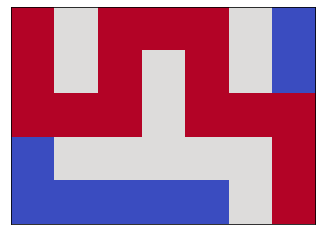

DFS Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6)]
DFS Time: 0.0
DFS Space Complexity: 15


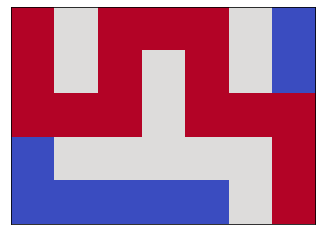

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import time

# Create maze function
def create_maze():
    maze = np.array([
        [0, 1, 0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 0]
    ])
    start = (0, 0)  # Starting point at (0, 0)
    goal = (4, 6)   # Goal point at (4, 6)
    return maze, start, goal

#  Visualization function for maze
def display_maze(maze, path=[]):
    maze_copy = np.copy(maze)  # Copy the maze to avoid modifying the original
    for position in path:
        maze_copy[position] = 2  # Mark the path with '2' (path cells)
    
    plt.imshow(maze_copy, cmap="coolwarm")  # Display the maze
    plt.xticks([]), plt.yticks([])  # Remove ticks for cleaner display
    plt.show()

#  Implement BFS
def bfs(maze, start, goal):
    queue = deque([start])  # Initialize the queue with the start node
    visited = set()         # Set to keep track of visited nodes
    visited.add(start)
    parent_map = {}         # To reconstruct the path once we find the goal

    while queue:
        node = queue.popleft()  # Dequeue the first node

        # If we reach the goal, stop the search
        if node == goal:
            break

        # Explore neighbors
        for direction in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (node[0] + direction[0], node[1] + direction[1])

            # Check if the neighbor is within bounds, not visited, and walkable (0)
            if (0 <= neighbor[0] < maze.shape[0] and 
                0 <= neighbor[1] < maze.shape[1] and 
                neighbor not in visited and 
                maze[neighbor] == 0):

                visited.add(neighbor)
                parent_map[neighbor] = node
                queue.append(neighbor)

    # Reconstruct the path from goal to start
    path = []
    if goal in parent_map:
        current = goal
        while current != start:
            path.append(current)
            current = parent_map[current]
        path.append(start)
        path.reverse()  # Reverse the path to get it from start to goal
    return path

#  Implement DFS
def dfs(maze, start, goal):
    stack = [start]  # Initialize the stack with the start node
    visited = set()  # Set to keep track of visited nodes
    visited.add(start)
    parent_map = {}  # To reconstruct the path once we find the goal

    while stack:
        node = stack.pop()  # Pop the last node (LIFO)

        # If we reach the goal, stop the search
        if node == goal:
            break

        # Explore neighbors
        for direction in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (node[0] + direction[0], node[1] + direction[1])

            # Check if the neighbor is within bounds, not visited, and walkable (0)
            if (0 <= neighbor[0] < maze.shape[0] and 
                0 <= neighbor[1] < maze.shape[1] and 
                neighbor not in visited and 
                maze[neighbor] == 0):

                visited.add(neighbor)
                parent_map[neighbor] = node
                stack.append(neighbor)

    # Reconstruct the path from goal to start
    path = []
    if goal in parent_map:
        current = goal
        while current != start:
            path.append(current)
            current = parent_map[current]
        path.append(start)
        path.reverse()  # Reverse the path to get it from start to goal
    return path

# Analyze performance (execution time and space complexity)
def analyze_performance(algorithm, maze, start, goal):
    start_time = time.time()  # Start time for performance measurement
    path = algorithm(maze, start, goal)  # Run the algorithm
    end_time = time.time()  # End time for performance measurement
    execution_time = end_time - start_time  # Calculate execution time
    space_complexity = len(path)  # Space complexity is just the path length
    return path, execution_time, space_complexity

#  Run and compare BFS and DFS
maze, start, goal = create_maze()

# BFS
bfs_path, bfs_time, bfs_space = analyze_performance(bfs, maze, start, goal)
print("BFS Path:", bfs_path)
print("BFS Time:", bfs_time)
print("BFS Space Complexity:", bfs_space)
display_maze(maze, bfs_path)  # Visualize the BFS path

# DFS
dfs_path, dfs_time, dfs_space = analyze_performance(dfs, maze, start, goal)
print("DFS Path:", dfs_path)
print("DFS Time:", dfs_time)
print("DFS Space Complexity:", dfs_space)
display_maze(maze, dfs_path)  # Visualize the DFS pathimport numpy as np
import matplotlib.pyplot as plt
from collections import deque
import time

